In [1]:
# ms-python.python added
import os
try:
    os.chdir(os.path.join(
        os.getcwd(), 'jupyters_and_slides/2019-summer/assignments'))
    print(os.getcwd())
except:
    pass

 ## Lesson-01 Assignment

 >

 `各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。`

 ## 本次作业的内容

 #### 1. 复现课堂代码

 在本部分，你需要参照我们给大家的GitHub地址里边的课堂代码，结合课堂内容，复现内容。

In [2]:
simple_grammer = '''sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
verb_phrase => verb noun_phrase
Adj* => null | Adj Adj*
Article => 这 | 那
noun => 女人 |球| 桌 | 猫
verb => 观察 | 坐在 | 听 | 看
Adj => 蓝色的 | 好看的 | 小的
'''

In [3]:
import random

def create_grammar(grammar_str,split='=>',line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|') ]
    return grammar

choice = random.choice

def generate(grammar,target):
    if target not in grammar:return target
    expaned = [generate(grammar,t) for t in choice(grammar[target])]
    return ''.join([e  for e in expaned if e != 'null'])

In [4]:
example = create_grammar(simple_grammer)

In [5]:
generate(example,target='sentence')


'那球听那女人'

In [6]:
# 西部世界
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""
host_grammar = create_grammar(host,split='=')

In [7]:
for i in range(20):
    print(generate(host_grammar,target='host'))

你好我是4号,您需要打牌吗？
你好我是3947494号,请问你要打牌吗？
您好我是38号,您需要打猎吗？
您好我是3号,请问你要喝酒吗？
女士,你好我是3号,您需要赌博吗？
你好我是8号,请问你要赌博吗？
你好我是4号,请问你要打牌吗？
小朋友,你好我是5号,请问你要打猎吗？
您好我是6号,请问你要喝酒吗？
女士,你好我是9号,请问你要打牌吗？
先生,你好我是1号,请问你要赌博吗？
小朋友,您好我是6号,您需要赌博吗？
女士,你好我是99982255号,请问你要喝酒吗？
女士,你好我是5号,您需要喝酒吗？
小朋友,你好我是976号,请问你要赌博吗？
你好我是98号,请问你要赌博吗？
小朋友,你好我是7号,请问你要打猎吗？
小朋友,你好我是1号,请问你要赌博吗？
你好我是7号,请问你要打牌吗？
你好我是33号,请问你要赌博吗？


In [8]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""
program_gram = create_grammar(programming,split='=>')
generate(program_gram,'stmt')



'name3=infostudent2'

 #### `jieba`分词

In [9]:
import pandas as pd 
file_name = '../datasource/sqlResult_1558435.csv'
df = pd.read_csv(file_name,encoding='gb18030')
articles = df['content'].tolist()

import re
def tocken(strs):
    return re.findall('\w+',strs)

In [10]:
import jieba 
from collections import Counter



In [11]:
jieba_cut_counter = Counter(jieba.cut(articles[0]))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 2.940 seconds.
Prefix dict has been built succesfully.


In [12]:
articles_clean = [''.join(tocken(str(article))) for article in articles]

In [13]:
with open('article9k.txt','w') as f:
    for i in range(9000):
        f.write(articles_clean[i]+'\n')

In [14]:
def cut(strs): return list(jieba.cut(strs))
TOCKEN = [] 
for i, line in enumerate(open('article9k.txt')):
    if i %100 == 0 :
        print(i,line)
    TOCKEN +=  cut(line)


0 此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息

100 nan

200 阿森纳和桑切斯续约的问题已经拖了一个赛季了至今依然没有解决考虑到智利人的合同只剩下最后一年了如果无法续约阿森纳最好的方式今夏将他卖掉套现如今桑切斯热门的下家只剩拜仁和曼城了来自每日镜报的消息称拜仁认为桑切斯可能已经做好决定他贴心要去曼城了早前英国媒体就曾经报道过曼城愿意支付5000万镑的转会费收购桑切斯考虑到他的合同只剩一年这个价格已经非常良心了但是阿森纳不愿意将桑切斯卖给自己同联赛的竞争对手他们更希望将桑切斯卖给拜仁即便拜仁在能提供的转会费上并不如曼城那么可观不过拜仁如今也面临着难题即便和阿森纳在桑切斯的转会费问题上达成一致拜仁也无法满足桑切斯的工资要求每日镜报称桑切斯告知拜仁如果加盟拜仁他要求得到一份年薪2185万镑的合同这意味着他的周薪会达到42万镑这将彻底打破拜仁现行的工资结构这是拜仁无法接受的工资谈不妥交易就无法完成每日镜报称拜仁担忧桑切斯坚持要巨额合同的原因是他根本不想来拜仁只是想用高薪做手段逼迫拜仁放弃求购这样阿森纳就只能和曼城做交易了马尔科

300 原标题小伙想变女人在家挥刀自宫遇到过因为运动导致睾丸扭转坏死的因为车祸等意外导致睾丸破裂的也遇到过网上买了器具自己在家割包皮的但像他这样自己在家割睾丸的还是第一次遇到杭州市一家医院的医生感叹道看视频自学小伙儿在家挥刀自宫这位自己割蛋蛋的壮士究竟是什么情况事情还得从10多天前说起10多天前的一个中午一名着装正常的男子被送到了医院的急诊室只见他的裤裆满是鲜血下身还不断有血液涌出起初医护人员以为这名长得还挺好看的患者是出了什么意外事故才导致下体出血但不久便发现事情并不简单治疗中发现患者的两侧睾丸已经不翼而飞了而流血不止的恰是左侧睾丸询问过患者情况令黄亚胜惊讶的是这个小伙子竟然通过睾丸切除视频自学然后在网上买了止血钳麻药等器具和药物最后在家中独自做了睾丸切除手术切除还算顺利右侧经过止血钳也止住了血但左侧不知道出了什么情况血流不止最后吓得患者只得打了120睾丸中存在动脉如果没有及时止住

In [15]:
word_count = Counter(TOCKEN)

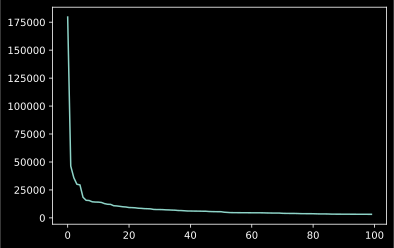

In [16]:
import matplotlib.pyplot as plt 
frequency = [f for k,f in word_count.most_common(100)]
plt.plot(list(range(100)),frequency)

In [17]:
def prob_1(word):
    return word_count[word] / len(TOCKEN)

TOCKEN_2_GRAM = [''.join(TOCKEN[i:i+2]) for i in range(len(TOCKEN)-1)]
word_count_2 = Counter(TOCKEN_2_GRAM)

def prob_2(word1,word2):
    if word1+word2 in word_count_2.keys(): return word_count_2[word1+word2]/ len(TOCKEN_2_GRAM)
    else: return 1/ len(TOCKEN_2_GRAM)
prob_2('我们','在')

4.6276244796347115e-05

In [18]:
def get_prob(sentence):
    words = cut(sentence)
    probs = 1
    for i in range(len(words)-1):
        word = words[i]
        n_word = words[i+1]
        probs *= prob_2(word,n_word)
    return probs
get_prob('我觉得不行')

1.5050098718508478e-11

 #### 2. 请回答以下问题

 回答以下问题，并将问题发送至 mqgao@kaikeba.com中：
 ```
     2.1. what do you want to acquire in this course？
     2.2. what problems do you want to solve？
     2.3. what’s the advantages you have to finish you goal?
     2.4. what’s the disadvantages you need to overcome to finish you goal?
     2.5. How will you plan to study in this course period?
 ```

 #### 3. 如何提交
 代码 + 此 jupyter 相关，提交至自己的 github 中(**所以请务必把GitHub按照班主任要求录入在Trello中**)；
 第2问，请提交至mqgao@kaikeba.com邮箱。
 #### 4. 作业截止时间
 此次作业截止时间为 2019.7.6日

 #### 5. 完成以下问答和编程练习

 >

 ## 基础理论部分

 #### 0. Can you come up out 3 sceneraies which use AI methods?

 Ans: {
 1. 自动驾驶
 2. 人脸识别
 3. 机器翻译}

 #### 1. How do we use Github; Why do we use Jupyter and Pycharm;

 Ans: {`github`是我们存放、获取课程资料以及提交课程作业的平台 ，`jupyter`和`pycharm`是我们运行、调试代码的IDE。`jupyter`
 适合实验和展示我们开发思路以及实验效果。`pycharm`更适用于大型工程项目的构建。}

 #### 2. What's the Probability Model?

 Ans: 概率模型是指对词/句的出现的概率建模，通过统计词出现的频率来估计词的概率。使用概率来生成词/句。

 #### 3. Can you came up with some sceneraies at which we could use Probability Model?

 Ans: 生成句子时, 可以使用概率模型生成出现概率最高的句子. 在机器翻译问题中,也可以使用概率模型

 #### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

 Ans: 由语法生成的句子一定符合语法, 但人类产生的语句不一定符合语法.
 使用基于统计的概率模型,能让生成的句子更像是人话.

 #### 5. What's the Language Model;

 Ans: 语言模型是对生成句子的概率建模.

 #### 6. Can you came up with some sceneraies at which we could use Language Model?

 Ans: 语言模型可以用于生成概率模型. 用于生成语句.

 #### 7. What's the 1-gram language model;

 Ans:1-gram模型是将概率模型大幅简化, 某个词出现的条件概率,只和它上一个相连的词相关

 #### 8. What's the disadvantages and advantages of 1-gram language model;

 Ans: # 1-gram模型是将模型复杂度大大简化,计算速度加快. 但带来的问题是, 某个词出现的频率不仅是和上一个词相关, 也和前几个词都相关
 这样模型的效果就不会很好

 #### 9. What't the 2-gram models;

 Ans: 2-gram模型与1-gram模型相似, 不同之处仅是在计算概率时考虑了词前两个相邻的词联合概率.

 ## 编程实践部分

 #### 1. 设计你自己的句子生成器

 如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

 计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

 在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

 >
 >

 ![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b10000_10000&sec=1561818705&di=95ca9ff2ff37fcb88ae47b82c7079feb&src=http://s7.sinaimg.cn/mw690/006BKUGwzy75VK46FMi66&690)

 >
 >

 在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

 在西部世界里，一个”人类“的语言可以定义为：
 ```

In [19]:
# human = """
# human = 自己 寻找 活动
# 自己 = 我 | 俺 | 我们
# 寻找 = 看看 | 找找 | 想找点
# 活动 = 乐子 | 玩的
# """
# ```
#
# 一个“接待员”的语言可以定义为
# ```
# host = """
# host = 寒暄 报数 询问 业务相关 结尾
# 报数 = 我是 数字 号 ,
# 数字 = 单个数字 | 数字 单个数字
# 单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
# 寒暄 = 称谓 打招呼 | 打招呼
# 称谓 = 人称 ,
# 人称 = 先生 | 女士 | 小朋友
# 打招呼 = 你好 | 您好
# 询问 = 请问你要 | 您需要
# 业务相关 = 玩玩 具体业务
# 玩玩 = 耍一耍 | 玩一玩
# 具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
# 结尾 = 吗？"""
#
# ```
#
#
#

 请定义你自己的语法:

 第一个语法：

In [20]:
jojo_meme = '''
sentence =>  meme1 | meme2 | meme3 
meme1 => 角色名 , 人称代词 动词* 名词 啦 !
meme2 => 人称代词 真是 形容词 副词 啦 !
meme3 => 欧拉* 木大*
角色名 => JOJO | DIO | 布加拉提
人称代词 => 你 | 我 | 他
动词* => 不 动词 | 动词
动词 => 做 | 当 | 变 | 是
名词 => 人 | 吸血鬼 | 替身
形容词 => high | low
副词 => 到不行 | 极点
欧拉* => 欧拉 | 欧拉 欧拉*
木大* => 木大 | 木大 木大*
'''


 第二个语法：

In [21]:
statement = '''
sentence => 代词 副词 是 让人 形容词 啦
代词 => 这 | 那 
副词 => 真 | 特别 | 尤其 | 非常 | 过于
形容词 => 难受 | 想哭 | 绝望 | high到不行 | 喜极而泣
'''


In [22]:
jojo_gram = create_grammar(jojo_meme)
print(generate(jojo_gram,'sentence'))
sentence_gram = create_grammar(statement)
print(generate(sentence_gram,'sentence'))

欧拉木大木大木大木大木大木大木大木大木大
那特别是让人难受啦


 TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [23]:
def generate_n(n=10):
    sentence = []
    if n == 0 :
        return sentence
    else:
        for i in range(n):
            sentence.append(generate(jojo_gram,'meme1'))
    return sentence 
generate_n(10)


['DIO,他不变吸血鬼啦!',
 'DIO,我不是吸血鬼啦!',
 'DIO,他不是替身啦!',
 'JOJO,你做人啦!',
 '布加拉提,他不是替身啦!',
 'DIO,你不是人啦!',
 'DIO,我不当替身啦!',
 'JOJO,我做替身啦!',
 '布加拉提,我不做人啦!',
 '布加拉提,你做人啦!']

 >

 #### 2. 使用新数据源完成语言模型的训练

 按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

 1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
     + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
     + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
 2. 修改代码，获得新的**2-gram**语言模型
     + 进行文本清洗，获得所有的纯文本
     + 将这些文本进行切词
     + 送入之前定义的语言模型中，判断文本的合理程度

 >

In [24]:
file_path = '../datasource/movie_comments.csv'
df = pd.read_csv(file_path)
comments = df['comment'].tolist()
comments_clean = [''.join(tocken(str(comment))) for comment in comments]

/home/chihao/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
NEW_TOCKEN = [] 
for i in range(20000):
    NEW_TOCKEN += cut(comments_clean[i])

In [26]:
word_counter = Counter(NEW_TOCKEN)
def prob(word1,word2):
    if word1+word2 in word_counter.keys(): return word_counter[word1+word2] / len(NEW_TOCKEN)
    else: return 1/len(NEW_TOCKEN)
def sentence_prob(sentence):
    sentence_clean = ''.join(tocken(str(sentence)))
    words = cut(sentence_clean)
    probs = 1
    for i in range(len(words)-1):
        word = words[i]
        n_word = words[i+1]
        probs *= prob(word,n_word)
    return probs

 #### 3. 获得最优质的的语言

 当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子:



 提示，要实现这个函数，你需要Python的sorted函数

In [27]:
sorted([1, 3, 5, 2])


[1, 2, 3, 5]

 这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [28]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])


[(1, 4), (2, 5), (4, 4), (5, 0)]

 能够让list按照第0个元素进行排序.

In [29]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])


[(5, 0), (1, 4), (4, 4), (2, 5)]

 能够让list按照第1个元素进行排序.

In [30]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)


[(2, 5), (1, 4), (4, 4), (5, 0)]

 能够让list按照第1个元素进行排序, 但是是递减的顺序。

 >

In [31]:
def generate_best():  # you code here
    sentences = generate_n(20)
    sentence_list = [] 
    for i in sentences:
        sentence_list.append((i, sentence_prob(i)))
    return sorted(sentence_list,key=lambda x: x[1], reverse=True)
    
generate_best()

[('DIO,他变吸血鬼啦!', 1.0974668528172723e-17),
 ('DIO,我做吸血鬼啦!', 2.4388694255811738e-23),
 ('DIO,我是人啦!', 2.4388694255811738e-23),
 ('DIO,他是替身啦!', 2.4388694255811738e-23),
 ('DIO,你变吸血鬼啦!', 2.4388694255811738e-23),
 ('DIO,你变吸血鬼啦!', 2.4388694255811738e-23),
 ('DIO,你是吸血鬼啦!', 2.4388694255811738e-23),
 ('JOJO,我做吸血鬼啦!', 2.4388694255811738e-23),
 ('DIO,我不是吸血鬼啦!', 2.4388694255811738e-23),
 ('JOJO,你不变吸血鬼啦!', 2.4388694255811738e-23),
 ('JOJO,他不当人啦!', 2.4388694255811738e-23),
 ('DIO,你不是人啦!', 2.4388694255811738e-23),
 ('JOJO,你不做吸血鬼啦!', 5.419830275297615e-29),
 ('布加拉提,他变吸血鬼啦!', 5.419830275297615e-29),
 ('布加拉提,他不当人啦!', 5.419830275297615e-29),
 ('布加拉提,我当人啦!', 5.419830275297615e-29),
 ('DIO,他不做吸血鬼啦!', 5.419830275297615e-29),
 ('布加拉提,我当人啦!', 5.419830275297615e-29),
 ('布加拉提,我变吸血鬼啦!', 1.2044334930326487e-34),
 ('布加拉提,我不做替身啦!', 2.67657835292484e-40)]

 好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

 >

 Q: 这个模型有什么问题？ 你准备如何提升？

 Ans:

 >

 ##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

 #### 4. (Optional) 完成基于Pattern Match的语句问答
 > 我们的GitHub仓库中，有一个assignment-01-optional-pattern-match，这个难度较大，感兴趣的同学可以挑战一下。


 #### 5. (Optional) 完成阿兰图灵机器智能原始论文的阅读
 1. 请阅读阿兰图灵关于机器智能的原始论文：https://github.com/Computing-Intelligence/References/blob/master/AI%20%26%20Machine%20Learning/Computer%20Machinery%20and%20Intelligence.pdf
 2. 并按照GitHub仓库中的论文阅读模板，填写完毕后发送给我: mqgao@kaikeba.com 谢谢

 >

 各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

 然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

 >

 ![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)